#### <img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº 9
#### Alumno: Mauro Fernández

# 1. Consigna

<div class="alert alert-block alert-info">
    <b>1)</b> Para el siguiente filtro digital se pide:
</div> 

$$y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)$$

Para $N = [3; 5]$

a) El diagrama de polos y ceros y su respuesta de módulo y fase

b) Corroborar respuesta mediante simulación computacional

<div class="alert alert-block alert-info">
    <b>2)</b> Para el siguiente filtro digital se pide:
</div> 

$$h(k) = (-1, 1)$$

a) El diagrama de polos y ceros y su respuesta de módulo y fase

b) Corroborar respuesta mediante simulación computacional

<div class="alert alert-block alert-info">
    <b>3)</b> Para el siguiente filtro digital se pide:
</div> 

<img src="./filtro.png" align="center" width="300" />

Para $N=(2;4)$ y $b=−1$

a) El diagrama de polos y ceros y su respuesta de módulo y fase

b) Corroborar respuesta mediante simulación computacional

<div class="alert alert-block alert-info">
    <b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div> 

* Ruido causado por el movimiento de los electrodos (Alta frecuencia)
* Ruido muscular (Alta frecuencia)
* Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)

<div class="alert alert-block alert-success">
    <b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div> 

<img src="./latidos_tiempo.png" align="center" width="500" />
<img src="./latido_promedio.png" align="center" width="500" />
<img src="./latidos_espectro.png" align="center" width="500" />

### Archivo ECG_TP4.mat
(variables)

* **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
* **qrs_pattern1**: Complejo de ondas QRS normal
* **heartbeat_pattern1**: Latido normal
* **heartbeat_pattern2**: Latido de origen ventricular
* **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos

a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a suavidad de los trazos y nivel isoeléctrico nulo.

### Defina la plantilla del filtro

fs0 = ?? # fin de la banda de detenida 0<br>
fc0 = ?? # comienzo de la banda de paso<br>
fc1 = ?? # fin de la banda de paso<br>
fs1 = ?? # comienzo de la banda de detenida 1

<div class="alert alert-block alert-success">
   <b>Ayuda</b>: Utilice algún estimador de la densidad espectral de potencia (Welch. Blackman-Tukey) para lograr un espectro con la mayor resolución espectral. Puede considerar al ancho de banda del ECG como la banda que contenga más del 90% de la potencia de la señal.
</div>

# 2. Resolución
## 2.1. Filtro 1
### 2.1.1. Para $N = 3$

<img src="./imagen_1.jpg" align="center" width="500" />
<img src="./imagen_2.jpg" align="center" width="500" />
<img src="./imagen_3.jpg" align="center" width="500" />
<img src="./imagen_4.jpg" align="center" width="500" />

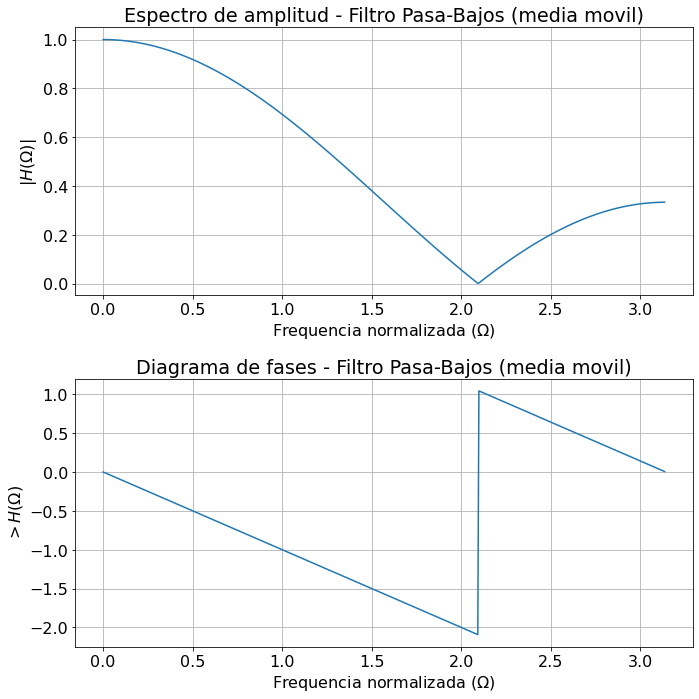

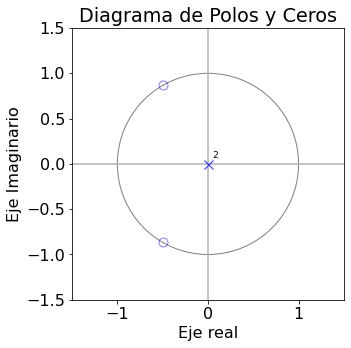

In [200]:
# Importamos bibliotecas a utilizar
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import matplotlib as mpl
from pds import zplane

# Configuramos tamaño de gráficos
mpl.rcParams['figure.figsize'] = (10,10)

# Configuramos tamaño de fuentes de gráficos
plt.rcParams.update({'font.size': 16})

# Definimos los coeficientes del polinomio del filtro en el numerador
a = np.array([1, 1, 1])

# Definimos los coeficientes del polinomio del filtro en el denominador
b = np.array([3, 0, 0])

# Obtenemos la resuesta en frecuencia del filtro a partir de los coeficientes de polinimios
ww, hh = sig.freqz(a, b)

# Graficamos espectro de amplitud y diagrama de fases
mpl.rcParams['figure.figsize'] = (10,10)

fig, axs = plt.subplots(2)
axs[0].set_title('Espectro de amplitud - Filtro Pasa-Bajos (media movil)')
axs[0].plot(ww, np.abs(hh))
axs[0].grid(which='both', axis='both')
axs[0].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[0].set_ylabel('$|H(\Omega)|$')

axs[1].set_title('Diagrama de fases - Filtro Pasa-Bajos (media movil)')
axs[1].plot(ww, np.angle(hh))
axs[1].grid(which='both', axis='both')
axs[1].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[1].set_ylabel('$>H(\Omega)$')

fig.tight_layout()
plt.show()

# Obtenemos los polos y ceros del filtro
mpl.rcParams['figure.figsize'] = (10,5)
z, p, k = sig.tf2zpk(a,b)

# Graficamos el diagrama de polos y ceros
zplane(z,p,xlabel="Eje real",ylabel="Eje Imaginario",title="Diagrama de Polos y Ceros")

### 2.1.2. Para $N = 5$

<img src="./imagen_5.jpg" align="center" width="500" />
<img src="./imagen_6.jpg" align="center" width="500" />
<img src="./imagen_7.jpg" align="center" width="500" />

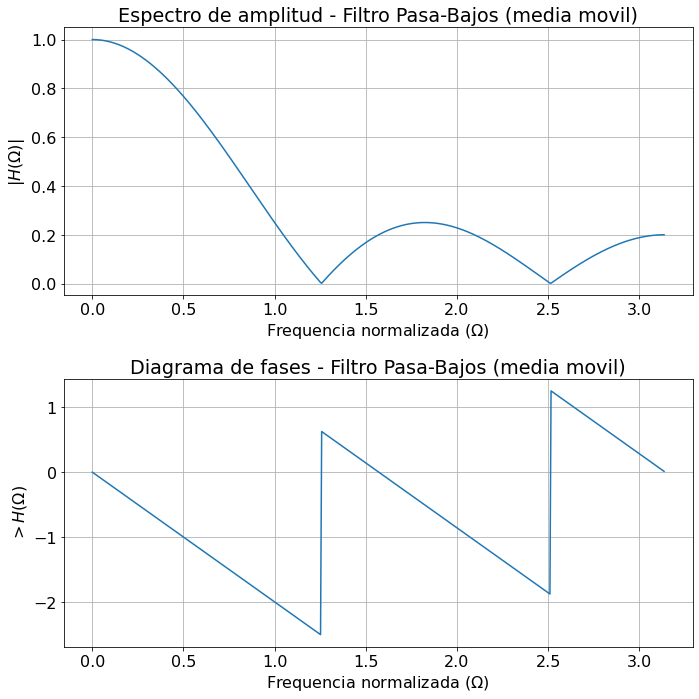

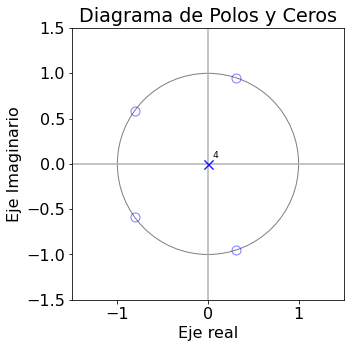

In [201]:
# Definimos los coeficientes del polinomio del filtro en el numerador
a = np.array([1, 1, 1, 1, 1])

# Definimos los coeficientes del polinomio del filtro en el denominador
b = np.array([5, 0, 0, 0, 0])

# Obtenemos la resuesta en frecuencia del filtro a partir de los coeficientes de polinimios
ww, hh = sig.freqz(a, b)

# Graficamos espectro de amplitud y diagrama de fases
mpl.rcParams['figure.figsize'] = (10,10)

fig, axs = plt.subplots(2)
axs[0].set_title('Espectro de amplitud - Filtro Pasa-Bajos (media movil)')
axs[0].plot(ww, np.abs(hh))
axs[0].grid(which='both', axis='both')
axs[0].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[0].set_ylabel('$|H(\Omega)|$')

axs[1].set_title('Diagrama de fases - Filtro Pasa-Bajos (media movil)')
axs[1].plot(ww, np.angle(hh))
axs[1].grid(which='both', axis='both')
axs[1].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[1].set_ylabel('$>H(\Omega)$')

fig.tight_layout()
plt.show()

# Obtenemos los polos y ceros del filtro
mpl.rcParams['figure.figsize'] = (10,5)
z, p, k = sig.tf2zpk(a,b)

# Graficamos el diagrama de polos y ceros
zplane(z,p,xlabel="Eje real",ylabel="Eje Imaginario",title="Diagrama de Polos y Ceros")


## 2.2. Filtro 2

<img src="./imagen_8.jpg" align="center" width="500" />
<img src="./imagen_9.jpg" align="center" width="500" />

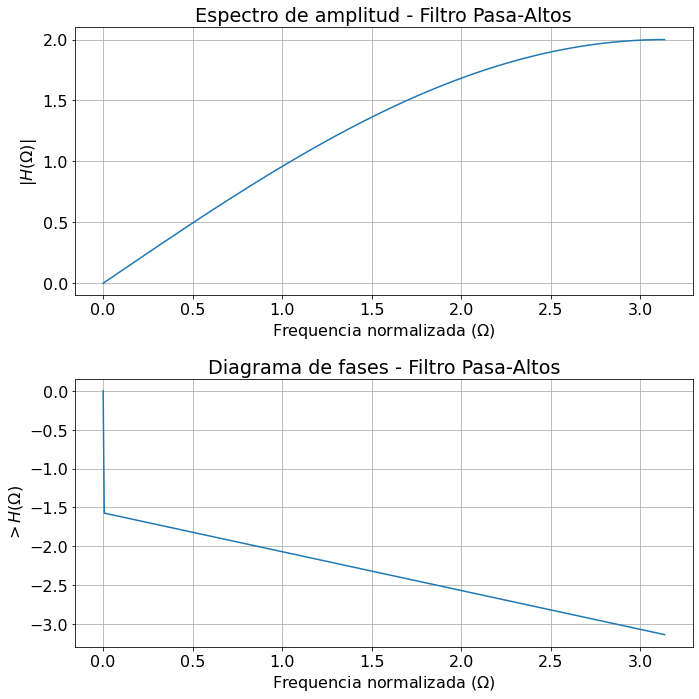

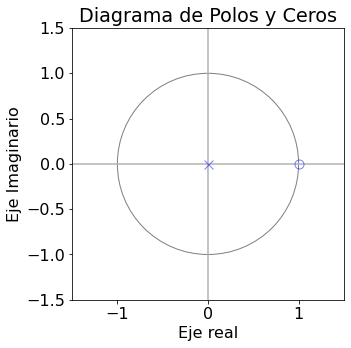

In [202]:
# Definimos los coeficientes del polinomio del filtro en el numerador
a = np.array([-1, 1])

# Definimos los coeficientes del polinomio del filtro en el denominador
b = np.array([1, 0])

# Obtenemos la resuesta en frecuencia del filtro a partir de los coeficientes de polinimios
ww, hh = sig.freqz(a, b)

# Graficamos espectro de amplitud y diagrama de fases
mpl.rcParams['figure.figsize'] = (10,10)

fig, axs = plt.subplots(2)
axs[0].set_title('Espectro de amplitud - Filtro Pasa-Altos')
axs[0].plot(ww, np.abs(hh))
axs[0].grid(which='both', axis='both')
axs[0].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[0].set_ylabel('$|H(\Omega)|$')

axs[1].set_title('Diagrama de fases - Filtro Pasa-Altos')
axs[1].plot(ww, np.angle(hh))
axs[1].grid(which='both', axis='both')
axs[1].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[1].set_ylabel('$>H(\Omega)$')

fig.tight_layout()
plt.show()

# Obtenemos los polos y ceros del filtro
mpl.rcParams['figure.figsize'] = (10,5)
z, p, k = sig.tf2zpk(a,b)

# Graficamos el diagrama de polos y ceros
zplane(z,p,xlabel="Eje real",ylabel="Eje Imaginario",title="Diagrama de Polos y Ceros")

## 2.3. Filtro 3
### 2.3.1. Para $N = 2$ y $b = -1$
<img src="./imagen_10.jpg" align="center" width="500" />
<img src="./imagen_11.jpg" align="center" width="500" />
<img src="./imagen_12.jpg" align="center" width="500" />

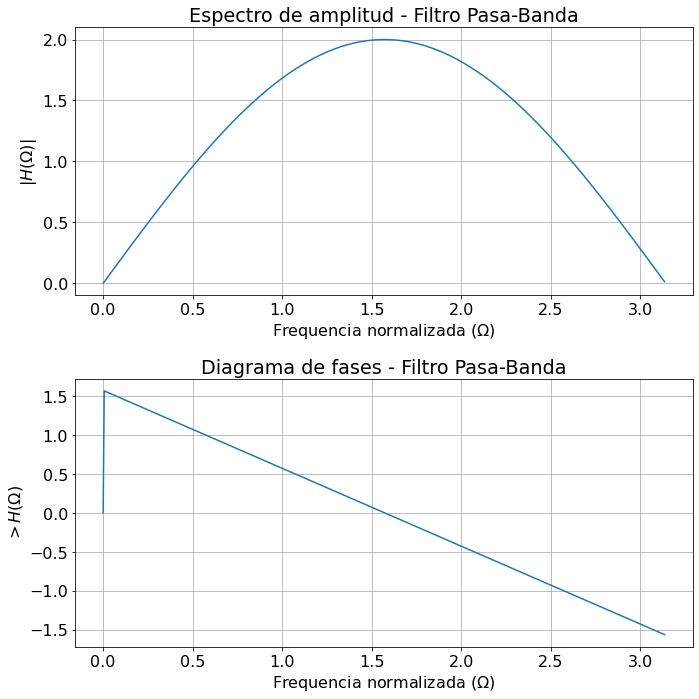

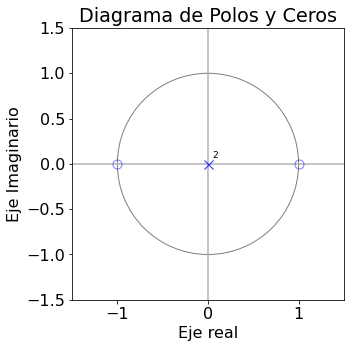

In [203]:
# Definimos los coeficientes del polinomio del filtro en el numerador
a = np.array([1, 0,-1])

# Definimos los coeficientes del polinomio del filtro en el denominador
b = np.array([1, 0, 0])

# Obtenemos la resuesta en frecuencia del filtro a partir de los coeficientes de polinimios
ww, hh = sig.freqz(a, b)

# Graficamos espectro de amplitud y diagrama de fases
mpl.rcParams['figure.figsize'] = (10,10)

fig, axs = plt.subplots(2)
axs[0].set_title('Espectro de amplitud - Filtro Pasa-Banda')
axs[0].plot(ww, np.abs(hh))
axs[0].grid(which='both', axis='both')
axs[0].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[0].set_ylabel('$|H(\Omega)|$')

axs[1].set_title('Diagrama de fases - Filtro Pasa-Banda')
axs[1].plot(ww, np.angle(hh))
axs[1].grid(which='both', axis='both')
axs[1].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[1].set_ylabel('$>H(\Omega)$')

fig.tight_layout()
plt.show()

# Obtenemos los polos y ceros del filtro
mpl.rcParams['figure.figsize'] = (10,5)
z, p, k = sig.tf2zpk(a,b)

# Graficamos el diagrama de polos y ceros
zplane(z,p,xlabel="Eje real",ylabel="Eje Imaginario",title="Diagrama de Polos y Ceros")

### 2.3.1. Para $N = 4$ y $b = -1$

<img src="./imagen_13.jpg" align="center" width="500" />
<img src="./imagen_14.jpg" align="center" width="500" />
<img src="./imagen_15.jpg" align="center" width="500" />

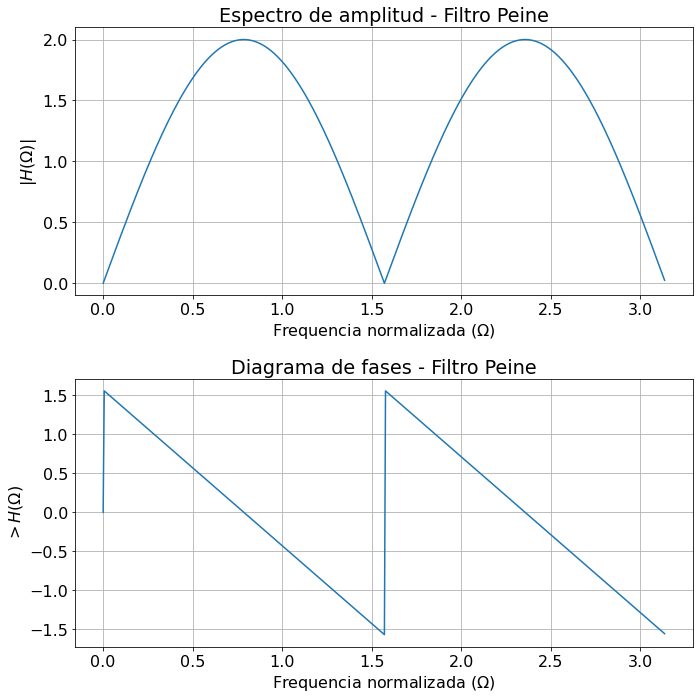

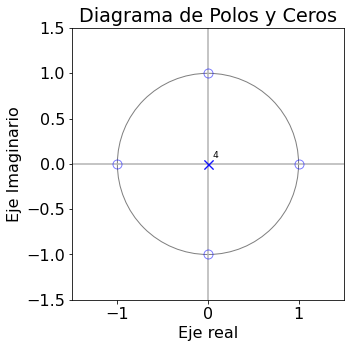

In [204]:
# Definimos los coeficientes del polinomio del filtro en el numerador
a = np.array([1, 0, 0, 0, -1])

# Definimos los coeficientes del polinomio del filtro en el denominador
b = np.array([1, 0, 0, 0, 0])

# Obtenemos la resuesta en frecuencia del filtro a partir de los coeficientes de polinimios
ww, hh = sig.freqz(a, b)

# Graficamos espectro de amplitud y diagrama de fases
mpl.rcParams['figure.figsize'] = (10,10)

fig, axs = plt.subplots(2)
axs[0].set_title('Espectro de amplitud - Filtro Peine')
axs[0].plot(ww, np.abs(hh))
axs[0].grid(which='both', axis='both')
axs[0].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[0].set_ylabel('$|H(\Omega)|$')

axs[1].set_title('Diagrama de fases - Filtro Peine')
axs[1].plot(ww, np.angle(hh))
axs[1].grid(which='both', axis='both')
axs[1].set_xlabel('Frequencia normalizada ($\Omega$)')
axs[1].set_ylabel('$>H(\Omega)$')

fig.tight_layout()
plt.show()

# Obtenemos los polos y ceros del filtro
mpl.rcParams['figure.figsize'] = (10,5)
z, p, k = sig.tf2zpk(a,b)

# Graficamos el diagrama de polos y ceros
zplane(z,p,xlabel="Eje real",ylabel="Eje Imaginario",title="Diagrama de Polos y Ceros")

## 2.4. Trabajo sobre señal ECG
### 2.4.1. Adquisición, normalización y alineación de los latidos presentes en registro
Se utilizan los índices de latidos detectados provistos por el dataset para encontrar los latidos.
Se toma una cierta cantidad de muestras a izquierda y derecha respecto a la posición indicada por el indice para formar el latido.
Cada latido se normaliza en amplitud respecto a la máxima amplitud encontrada entre todos los latidos. A su vez se quita la media de la señal para alinearlos respecto a la amplitud.

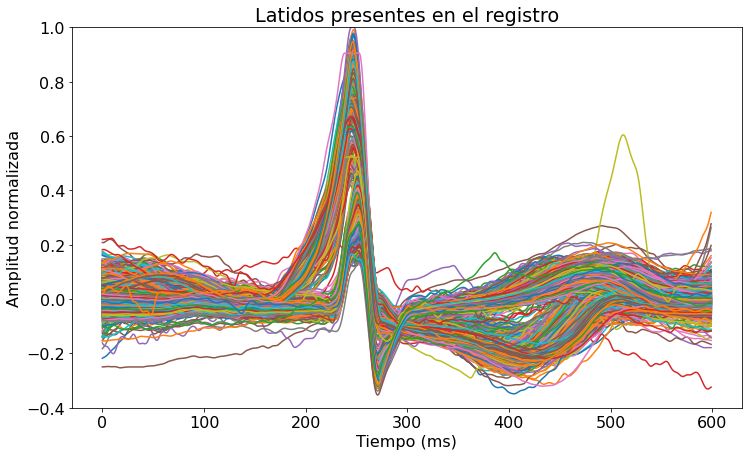

In [205]:
# Importamos bibliotecas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as sio

# Configuramos tamaño de gráficos
mpl.rcParams['figure.figsize'] = (12,7)

# Leemos el dataset desde el archivo ECG.mat
mat_struct = sio.loadmat("ecg.mat")

# Serie temporal con el registro del ECG
xx = mat_struct["ecg_lead"]

# Índices con la ubicación de los latidos detectados
qrs_detections = np.array(mat_struct["qrs_detections"])

# Definimos cantidad de realizaciones en función de la cantidad de latidos detectados
R = qrs_detections.size

# Definimos cantidad de muestras a tomar a izquierda y derecha para cada latido detectado
GAP1 = 250
GAP2 = 350

# Generamos una lista donde cada posición es un array de muestras de cada latido detectado
lista = [xx[int(qrs_detections[i]-GAP1):int(qrs_detections[i]+GAP2)] for i in range(0,R)]

# Generamos una matriz donde cada columna es un latido y cada fila es una muestra de cada latido
pulsos = np.hstack(lista)

# Quitamos el valor medio a las amplitudes de los latidos para alinearlos verticalmente
pulsos = pulsos - np.mean(pulsos,axis=0)

# Normalizamos amplitud de los latidos en función de la máxima amplitud en toda la matriz
pulsos = pulsos / np.max(pulsos)

# Graficamos los latidos detectados en el registro
plt.figure()
plt.plot(pulsos)
plt.title("Latidos presentes en el registro")
plt.ylabel("Amplitud normalizada")
plt.xlabel("Tiempo (ms)")
plt.ylim([-0.4,1])
plt.show()

### 2.4.2. Clasificación de los latidos y obtención del latido promedio
Para clasificar a los latidos entre normales y ventriculares, para cada latido se calcula respecto a los dos patrones el cofienciente de correlación $R$ y se verifica el valor obtenido:
* Si $R\_norm$ > $umbral\_norm$ & $R\_norm$ > $R\_vent$ => **LATIDO NORMAL**
* Si $R\_vent$ > $umbral\_vent$ & $R\_vent$ > $R\_norm$ => **LATIDO VENTRICULAR**

Para obtener el latido promedio simplemente se promedian todos los latidos agrupados según su tipo.

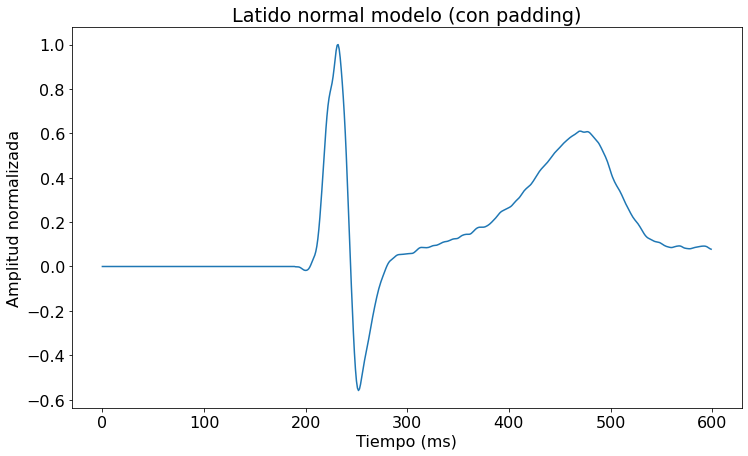

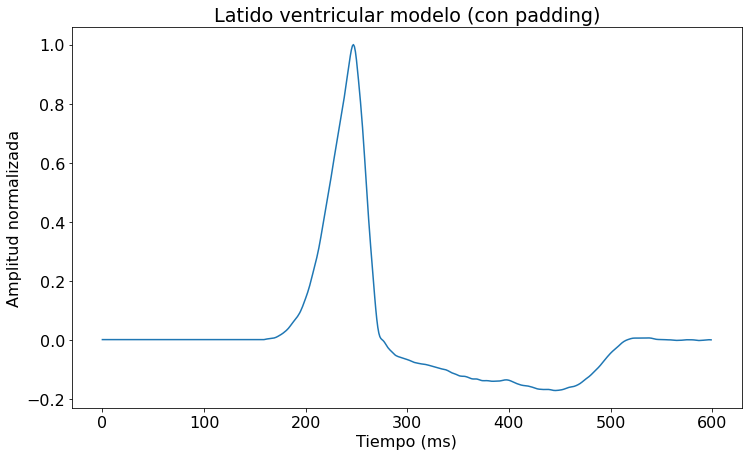

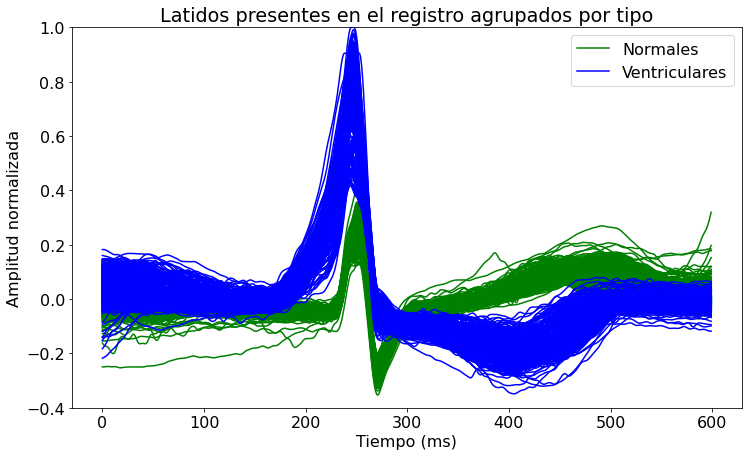

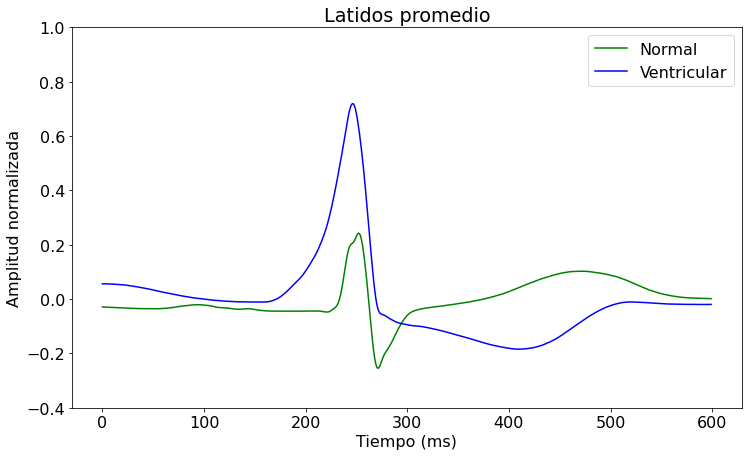

In [206]:
# Patrón de latidos normales y ventriculares
heartbeat_pattern1 = np.array(mat_struct["heartbeat_pattern1"])
heartbeat_pattern2 = np.array(mat_struct["heartbeat_pattern2"])

# Alineamos todas las amplitudes de forma tal que la primer muestra tenga aplitud 0
heartbeat_pattern1 = heartbeat_pattern1 - heartbeat_pattern1[0]
heartbeat_pattern2 = heartbeat_pattern2 - heartbeat_pattern2[0]

# Normalizamos la amplitud de los latidos patrones respecto a la máxima amplitud encontrada
heartbeat_pattern1 = heartbeat_pattern1 / np.max(heartbeat_pattern1)
heartbeat_pattern2 = heartbeat_pattern2 / np.max(heartbeat_pattern2)

# Aplanamos dimensión del patrón para poder aplicar padding
heartbeat_pattern1 = heartbeat_pattern1.flatten()
heartbeat_pattern2 = heartbeat_pattern2.flatten()

# Aplicamos padding a izquierda a los patrones, relllenando con el valor de la primer muestra
# Esto es requerido para que la dimensiones de los patrones coincidan con las dimensiones de los latidos y poder operar
heartbeat_pattern1 = np.pad(heartbeat_pattern1, (189, 0), 'constant', constant_values=(heartbeat_pattern1[0], 0))
heartbeat_pattern2 = np.pad(heartbeat_pattern2, (159, 0), 'constant', constant_values=(heartbeat_pattern2[0], 0))

# Definimos listas donde almacenamos los coeficientes calculados para cada modelo
corrs_norm = []
corrs_vent = []

# Cálculo de coeficientes de correlación para cada modelo y cada latido
for i in range(0,pulsos.shape[1]):
    pulso = pulsos[:,i].flatten()
    corr_norm = np.corrcoef(pulso,heartbeat_pattern1)
    corr_vent = np.corrcoef(pulso,heartbeat_pattern2)
    corrs_norm.append(corr_norm[0][1])
    corrs_vent.append(corr_vent[0][1])

# Transformamos las listas en numpy arrays
corrs_norm = np.array(corrs_norm)
corrs_vent = np.array(corrs_vent)
  
# Generamos indexador booleano para los latidos en base a los valores obtenidos de R
bcorrs1 = (corrs_norm > 0.1) & (corrs_norm > corrs_vent)
bcorrs2 = (corrs_vent > 0.8) & (corrs_vent > corrs_norm)

# Obtenemos los latidos normales y ventriculares en arrays separados a partir de indexador booleano
pulsos_normales      = pulsos[:,bcorrs1]
pulsos_ventriculares = pulsos[:,bcorrs2]

# Graficamos el modelo de latido normal
plt.figure()
plt.title("Latido normal modelo (con padding)")
plt.plot(heartbeat_pattern1)
plt.ylabel("Amplitud normalizada")
plt.xlabel("Tiempo (ms)")
plt.show()

# Graficamos el modelo de latido ventricular
plt.figure()
plt.title("Latido ventricular modelo (con padding)")
plt.plot(heartbeat_pattern2)
plt.ylabel("Amplitud normalizada")
plt.xlabel("Tiempo (ms)")
plt.show()

# Graficamos latidos clasificados en normales y ventriculares
plt.figure()
plt.title("Latidos presentes en el registro agrupados por tipo")
plt.plot(pulsos_normales,'g-', label='Normales')
plt.plot(pulsos_ventriculares,'b-', label='Ventriculares')
plt.ylabel("Amplitud normalizada")
plt.xlabel("Tiempo (ms)")
plt.ylim([-0.4,1])
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')
plt.show()

# Graficamos latidos promedio clasificados en normales y ventriculares
plt.figure()
plt.title("Latidos promedio")
plt.plot(np.mean(pulsos_normales,axis=1),'g-', label='Normal')
plt.plot(np.mean(pulsos_ventriculares,axis=1),'b-', label='Ventricular')
plt.ylabel("Amplitud normalizada")
plt.xlabel("Tiempo (ms)")
plt.ylim([-0.4,1])
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')
plt.show()

### 2.4.3. Estimación espectral del ECG y definición de la plantilla del filtro
Se realiza una estimación espectral del ECG para determinar el ancho de banda donde está la información de interés.
Para ello se toman los primeros 50 latidos detectados de cada tipo (normales y ventriculares) ya que al comienzo de la prueba de esfuerzo es donde mas pura es nuestra señal (menos ruido).
Luego se calcula la densidad espectral de potencia utilizando el método de Welch y obtenemos la PSD medio.

Una vez realizada la estimación de la PSD, definimos la plantilla del filtro.

Para determinar $fc_0$ (frecuencia de comienzo de la banda de paso) inspeccionamos el comportamiento de los latidos en diferentes etapas del ECG: 

1. Vemos que cuando comienza el ECG encontramos latidos normales y ventriculares puros, es decir, con poca contaminación de ruido. A su vez se debe comprender que es la situación donde el individuo examinado se encuentra en reposo, no está realizando esfuerzo. En estas condiciones observamos que la duración de un latido es de aprox. 500ms lo que en frecuencia es 2Hz. da una frecuencia de 2Hz.
2. Vemos que en etapas de esfuerzo aparece un movimiento de la línea de base, producto en parte por la respiración. Este movimiento observamos que tiene un periodo muy grande en relación al de los latidos, en el orden de 30s lo que en frecuencia es 0.033Hz

Como conclusión de lo explicado se asume que la energía del ECG se encuentra a partir de $fc_0 = 1Hz$.

Para determinar $fc_1$ (frecuencia de fin de la banda de paso) determinamos para los latidos normales y ventriculares del comienzo del ECG (donde practicamente no hay contaminación de ruido) en que frecuencia acumulamos el 99% de la energía de la señal. La frecuencia de corte elegida corresponde a aquella que cubre tanto la información de los latidos normales como la de los ventriculares.

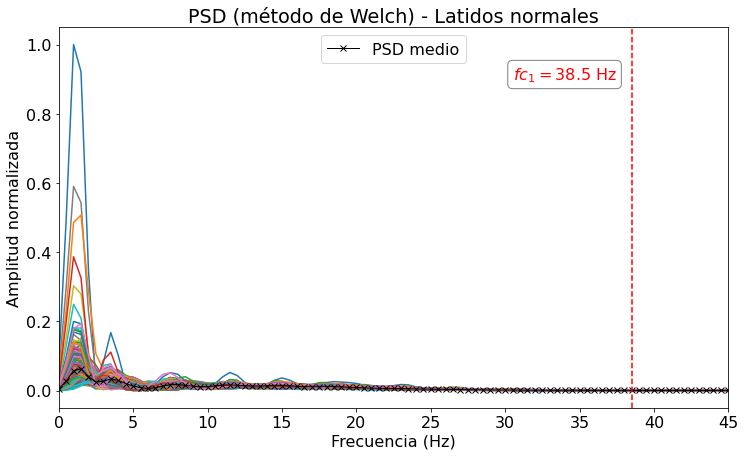

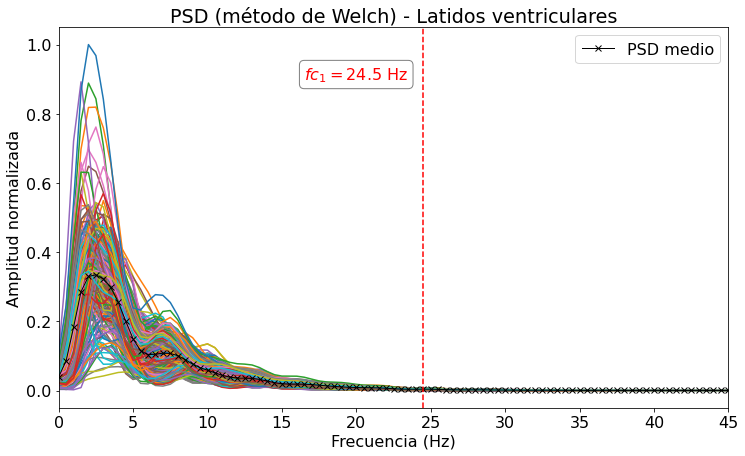

In [207]:
# Recuperamos los primeros 50 pulsos normales y ventriculares que tienen poco ruido, usando slicing
# NOTA: Es posible usar slicing dado que los indices de latidos detectados son crecientes (ordenados temporalmente)
pulsos_normales_puros      = pulsos_normales[:,:50]
pulsos_ventriculares_puros = pulsos_ventriculares[:,:50]

# Definimos la frecuencia de muestreo de nuestra señal
fs = 1000

# Para mejorar la visualización de nuestra DSP, aplicamos zero-padding a nuestra señal

# Definimos la cantidad de muestras a tomar para nuestra señal con padding (en ms)
N = 4000

# Calculamos la cantidad de padding a izquierda y derecha a aplicar a nuestra señal (es igual para normal y ventricular)
PAD = int((N - len(pulsos_normales_puros))/2)

# Aplicamos zero-padding a nuestras señales
pulsos_normales_puros_pad      = np.pad(pulsos_normales,      pad_width=((PAD,PAD), (0,0)), mode='constant')
pulsos_ventriculares_puros_pad = np.pad(pulsos_ventriculares, pad_width=((PAD,PAD), (0,0)), mode='constant')

# Calculamos el PSD de nuestras señales
f, psd_normales      = sig.welch(pulsos_normales_puros_pad,      fs=fs, nperseg=N/2,axis=0)
f, psd_ventriculares = sig.welch(pulsos_ventriculares_puros_pad, fs=fs, nperseg=N/2,axis=0)

# Normalizamos amplitud de las PSD
psd_normales      = psd_normales/np.max(psd_normales)
psd_ventriculares = psd_ventriculares/np.max(psd_ventriculares)

# Calculamos el PSD medio
psd_normales_avg      = np.mean(psd_normales,axis=1)
psd_ventriculares_avg = np.mean(psd_ventriculares,axis=1)

# Calculamos para la PSD media la relación entre la energía acumulada al bin y la energía total
psd_norm_cumsum = np.cumsum(psd_normales_avg)/np.sum(psd_normales_avg)
psd_vent_cumsum = np.cumsum(psd_ventriculares_avg)/np.sum(psd_ventriculares_avg)

# Definimos un umbral del 99% de la energía
psd_umbral = 0.99

# Obtenemos el indice asociado a la frecuencia de corte para comienzo de banda
idx_norm_umbral = np.argmax(psd_norm_cumsum >= psd_umbral)
idx_vent_umbral = np.argmax(psd_vent_cumsum >= psd_umbral)

# Graficamos PSD de latidos normales
plt.figure()
plt.title("PSD (método de Welch) - Latidos normales")
plt.plot(f,psd_normales)
plt.plot(f,psd_normales_avg,"-kx",lw=1,label="PSD medio")
plt.axvline(f[idx_norm_umbral],ls="--",color="r")
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
plt.text(f[idx_norm_umbral] - 8,0.9,"$fc_1 = {}$ Hz".format(f[idx_norm_umbral]),rotation=0,color="r", bbox=props)
plt.ylabel("Amplitud normalizada")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0,45)
plt.legend()
plt.show()

# Graficamos PSD de latidos ventriculares
plt.figure()
plt.title("PSD (método de Welch) - Latidos ventriculares")
plt.plot(f,psd_ventriculares)
plt.plot(f,psd_ventriculares_avg,"-kx",lw=1,label="PSD medio")
plt.axvline(f[idx_vent_umbral],ls="--",color="r")
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
plt.text(f[idx_vent_umbral] - 8,0.9,"$fc_1 = {}$ Hz".format(f[idx_vent_umbral]),rotation=0,color="r", bbox=props)
plt.ylabel("Amplitud normalizada")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0,45)
plt.legend()
plt.show()

Como puede observarse, $fc_1 = 38.5$ Hz para latidos normales y $fc_1 = 24.5$ Hz para latidos ventriculares. La diferencia radica en que los latidos ventriculares tienen mayor energía concentrada en los primeros bines, por eso se alcanza más rápidamente el porcentaje establecido. Para conservar la información de ambos tipos de latidos, tomamos la frecuencia de corte mas grande que es la de los latidos normales.

**Nota**: En clase obtuvimos un valor $fc_1 = 35$ Hz. La diferencia puede radicar en que en clase trabajamos con una PSD que contenia mezclada información tanto de los latidos ventriculares como normales, y a la misma se calculo la mediana para obtener una señal similar a los latidos normales. En este caso primero se clasificó a los latidos, se obtuvo la PSD para cada clase y luego se obtuvo la frecuencia de corte. A fines prácticos para no ir en contra de lo obtenido en clase y tener números redondos, se utiliza  $fc_1 = 35$ Hz.

Para determinar $fs_0$ se utiliza un critero práctico en función del tipo de filtro utilizado, no hay un fundamento teórico fuerte que indique el valor exacto a utilizar. Por lo general se utilizan valores de $fs_0 = 0$ Hz a $fs_0 = 0.1$ Hz. 
Utilizaremos para este trabajo $fs_0 = 0.1$ Hz.

Para determinar $fs_1$ buscaremos una transición lo mas holgada posible, que en terminos digitales es bastante poco. Por lo general una buena práctica es utilizar $fs_1 = 45$ Hz, por su cercanía a los $50$ Hz (donde se encuentra interferencia de red eléctrica).

### 3. Conclusiones
En la primera parte de este trabajo se realizó un repaso analítico y práctico de filtros FIR. Se observan una ligera diferencia en algunos diagramas de fase obtenidos analíticamente respecto a los obtenidos en forma práctica en computadora.

En la segunda parte de este trabajo se proceso un ECG a fin de obtener una plantilla que nos permita aplicar un filtro Pasa-Banda a los latidos, para quitar ruidos de baja y alta frecuencia. 

La plantilla obtenida es la siguiente:

* $fs_0 = 0.1$ Hz
* $fc_0 = 1$ Hz
* $fc_1 = 35$ Hz
* $fs_1 = 45$ Hz

Por otro lado para clasificar a los latidos se utilizo un método basado en el cálculo de coeficiente de correlación entre los latidos y dos modelos. Algo cuestionable de este método es que puede requerirse calibrar el modelo al realizar el ensayo en diferentes pacientes. 
